In [1]:
%matplotlib inline

Interpolating bad channels with MNE
==========================

In [229]:
import os
from copy import deepcopy
import numpy as np
import mne
import sys
sys.path.append("../data/")
sys.path.append("../")
sys.path.append("../visualize/")
import stacklineplot
from constants import *
from load_EEGs_mc import EEGDatasetMc
import torch
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from utils import interpolate_signals

In [230]:
dataset = EEGDatasetMc(TRAIN_FILES_CSV, max_num_examples=10, select_channels=[0,1,3,4])

In [240]:
i = 2
sample_data = dataset[i].numpy()
sample_data = sample_data
sample_data[1] *= 0 # noisify middle channel]
ch_names =  ['Fp1', 'Fp2', 'F3', 'F4'] # requires at least 4 channels
sample_data_info = mne.create_info(ch_names, 200, ch_types='eeg')
montage = mne.channels.make_standard_montage('standard_alphabetic')
sample_data_info.set_montage(montage)
raw = mne.io.RawArray(sample_data, sample_data_info)
raw.info['bads'] = ['Fp2']

Creating RawArray with float64 data, n_channels=4, n_times=1000
    Range : 0 ... 999 =      0.000 ...     4.995 secs
Ready.


In [241]:
grad_data = raw.copy()
grad_data_interp = grad_data.copy().interpolate_bads(reset_bads=False)

    Automatic origin fit: head of radius 52.0 mm
Computing interpolation matrix from 3 sensor positions
Interpolating 1 sensors


<ipython-input-241-44ad9871bb21>:2: RuntimeWarning: Only 4 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  grad_data_interp = grad_data.copy().interpolate_bads(reset_bads=False)
<ipython-input-241-44ad9871bb21>:2: RuntimeWarning: (X, Y) fit (0.6, 82.3) more than 20 mm from head frame origin
  grad_data_interp = grad_data.copy().interpolate_bads(reset_bads=False)


### With Channel Set to 0

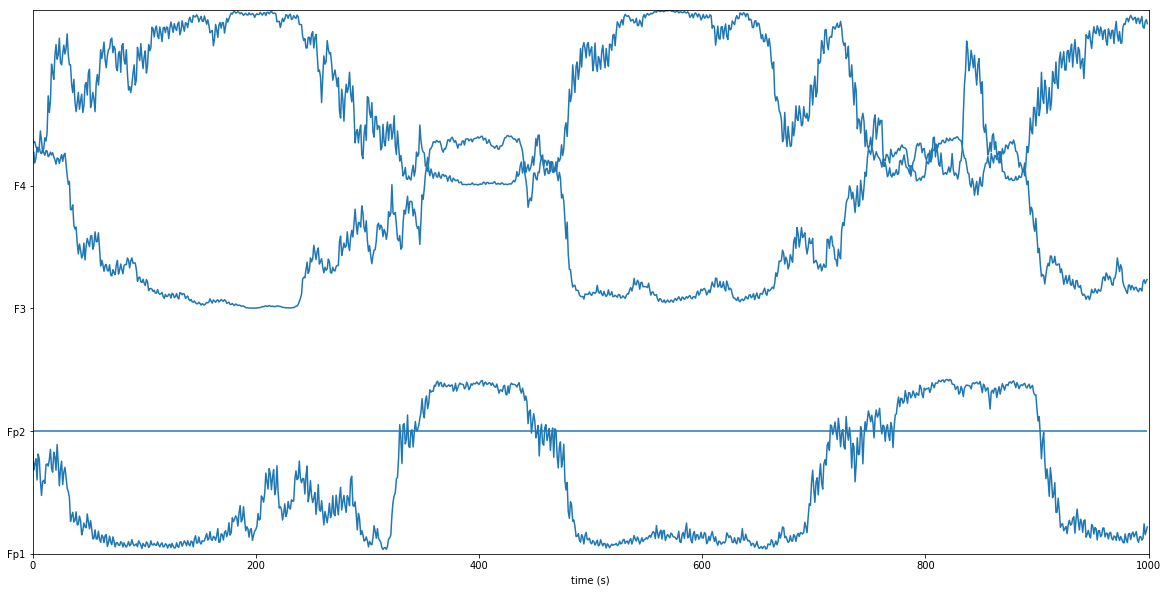

In [242]:
plt.rcParams['figure.figsize'] = [20, 10]
x, _ = grad_data[:] 
stacklineplot.stackplot(x, ylabels=ch_names)
# stacklineplot.stackplot(x[1:2], ylabels=ch_names)

### Fill with MNE

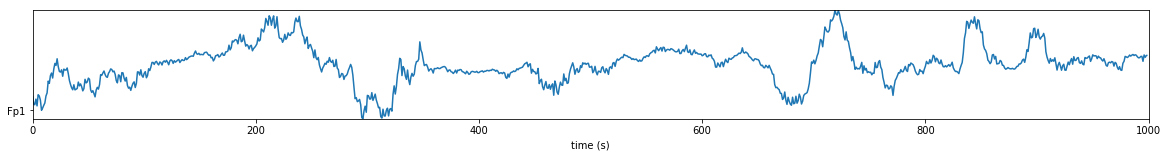

In [243]:
plt.rcParams['figure.figsize'] = [20, 2]
y, _ = grad_data_interp[:] 
# stacklineplot.stackplot(y, ylabels=ch_names)
stacklineplot.stackplot(y[1:2], ylabels=ch_names)

### FIll with Avg Function

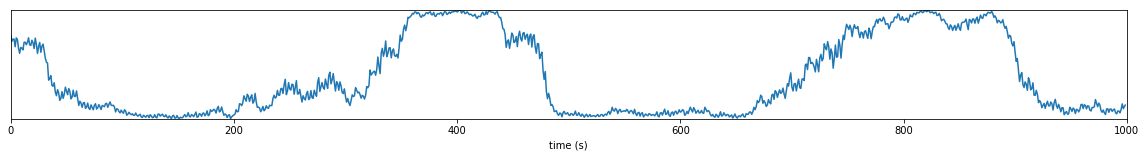

In [244]:
plt.rcParams['figure.figsize'] = [20, 2]
y_avg_missing = interpolate_signals(x[0], x[2])
y_avg = x
y_avg[1] = y_avg_missing 
# stacklineplot.stackplot(y_avg, ylabels=ch_names)
stacklineplot.stackplot(y_avg[1:2], ylabels=ch_names)

### Actual Values

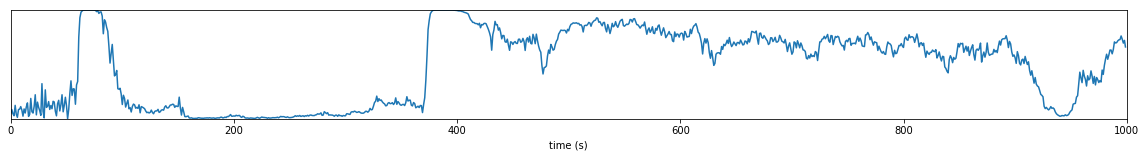

In [245]:
plt.rcParams['figure.figsize'] = [20, 2]
# stacklineplot.stackplot(dataset[0].numpy(), ylabels=ch_names)
stacklineplot.stackplot(dataset[0].numpy()[1:2], ylabels=ch_names)

In [249]:
actual_missing = dataset[1].numpy()
print("MNE", np.sum(np.abs(actual_missing[1] - y[1])))
print("AVG", np.sum(np.abs(actual_missing[1] - y_avg[1])))

MNE 371.48603277119923
AVG 313.91675940155983


The MNE function doesn't perform so well (square diff for it to be better)